<a href="https://colab.research.google.com/github/sergiomora03/AdvancedTopicsAnalytics/blob/main/notebooks/L10-VisualizingEmbeddingsUsingTSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualizing Embeddings Using TSNE

This notebook demostrates visualization of embeddings using TSNE.
We will use the embedings trained in 66MB, glove, trained on wikipedia.

In [1]:
import gensim
import gensim.downloader as api
import matplotlib.pyplot as plt #to generate the t-SNE plot
from sklearn.manifold import TSNE #scikit learn's TSNE
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Download embeddings (66MB, glove, trained on wikipedia)
model = api.load("glove-wiki-gigaword-50")

## TSNE
t-SNE stands for t-distributed Stochastic Neighbouring Entities. Its a technique used for visualizing high dimensional data by reducing it to a 2 or 3 dimensions.


In [3]:
#Preprocessing our models vocabulary to make better visualizations

words_vocab= list(model.key_to_index)#all the words in the vocabulary.
print("Size of Vocabulary:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:50])

#Let us remove the stop words from this it will help making the visualization cleaner
stopwords_en = stopwords.words()
words_vocab_without_sw = [word.lower() for word in words_vocab if not word in stopwords_en]
print("Size of Vocabulary without stopwords:",len(words_vocab_without_sw))
print("Few words in Vocabulary without stopwords",words_vocab_without_sw[:30])
#The size didnt reduce much after removing the stop words so lets try visualizing only a selected subset of words

Size of Vocabulary: 400000
Few words in Vocabulary ['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s", 'for', '-', 'that', 'on', 'is', 'was', 'said', 'with', 'he', 'as', 'it', 'by', 'at', '(', ')', 'from', 'his', "''", '``', 'an', 'be', 'has', 'are', 'have', 'but', 'were', 'not', 'this', 'who', 'they', 'had', 'i', 'which', 'will', 'their', ':', 'or', 'its', 'one', 'after']
Size of Vocabulary without stopwords: 397792
Few words in Vocabulary without stopwords [',', '.', '"', "'s", '-', '(', ')', "''", '``', ':', "'", 'year', '--', "n't", 'percent', 'government', 'time', '$', 'years', 'world', ';', 'president', 'state', 'million', '_', 'u.s.', 'united', 'states', 'city', 'made']


In [4]:
#With the increase in the amount of data, it becomes more and more difficult to visualize and interpret
#In practice, similar words are combined into groups for further visualization.

keys = ['school', 'year', 'college', 'city', 'states', 'university', 'team', 'film']#['king', 'man', 'women', 'queen', 'beautiful', 'kingdom', 'rich', 'kind']
embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)#apending access vector of all similar words
    word_clusters.append(words)#appending list of all smiliar words

In [5]:
print("Embedding clusters:",embedding_clusters[0][0])#Access vector of the first word only
print("Word Clousters:",word_clusters[:2])

Embedding clusters: [-1.2283e+00  1.4176e+00 -6.8625e-01 -1.1615e+00 -1.9627e-03 -5.2577e-01
 -1.5977e+00 -2.5307e-01 -2.1699e-01 -5.6572e-01 -1.4248e-01  1.5765e-01
  1.8763e-01 -1.3173e+00 -5.3438e-01  2.0573e-01 -4.7985e-01  1.0476e+00
 -5.0750e-01  7.7326e-01  3.9774e-01  7.0346e-01 -3.2232e-01  6.0171e-01
 -1.3352e-01 -1.8420e+00 -9.2598e-02 -1.1288e+00 -1.4859e+00 -8.6235e-01
  2.5976e+00  6.6146e-01 -5.4094e-02 -1.5755e+00  1.1185e+00  1.3911e-01
 -2.6915e-01  5.7159e-01  1.3328e+00 -2.4861e-01 -6.8554e-01 -4.3956e-01
 -8.6744e-01  9.5772e-01 -6.7349e-01  3.6049e-01  6.1952e-01 -2.6356e-01
 -3.7150e-01  3.2093e-01]
Word Clousters: [['college', 'schools', 'campus', 'graduate', 'elementary', 'students', 'university', 'student', 'attended', 'graduating', 'teaching', 'colleges', 'graduated', 'teacher', 'education', 'high', 'faculty', 'academy', 'harvard', 'graduation', 'taught', 'classes', 'secondary', 'teachers', 'enrolled', 'undergraduate', 'yale', 'boys', 'arts', 'pennsylvania'],

In [6]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape #geting the dimensions
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it

### Hyperparameters of TSNE

1. n_components: The number of components, i.e., the dimension of the value space
2. perplexity: The number of effective neighbours
3. n_iter: Maximum number of iterations for the optimization.
4. init: Initialization of embedding.

t-SNE requires good amount of hyperparameter tuning to give effective results. More details on the hyperparameters can be found in the official [docs](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). It is very easy to misread tsne too. This [article](https://distill.pub/2016/misread-tsne/) provides more deatils about it.

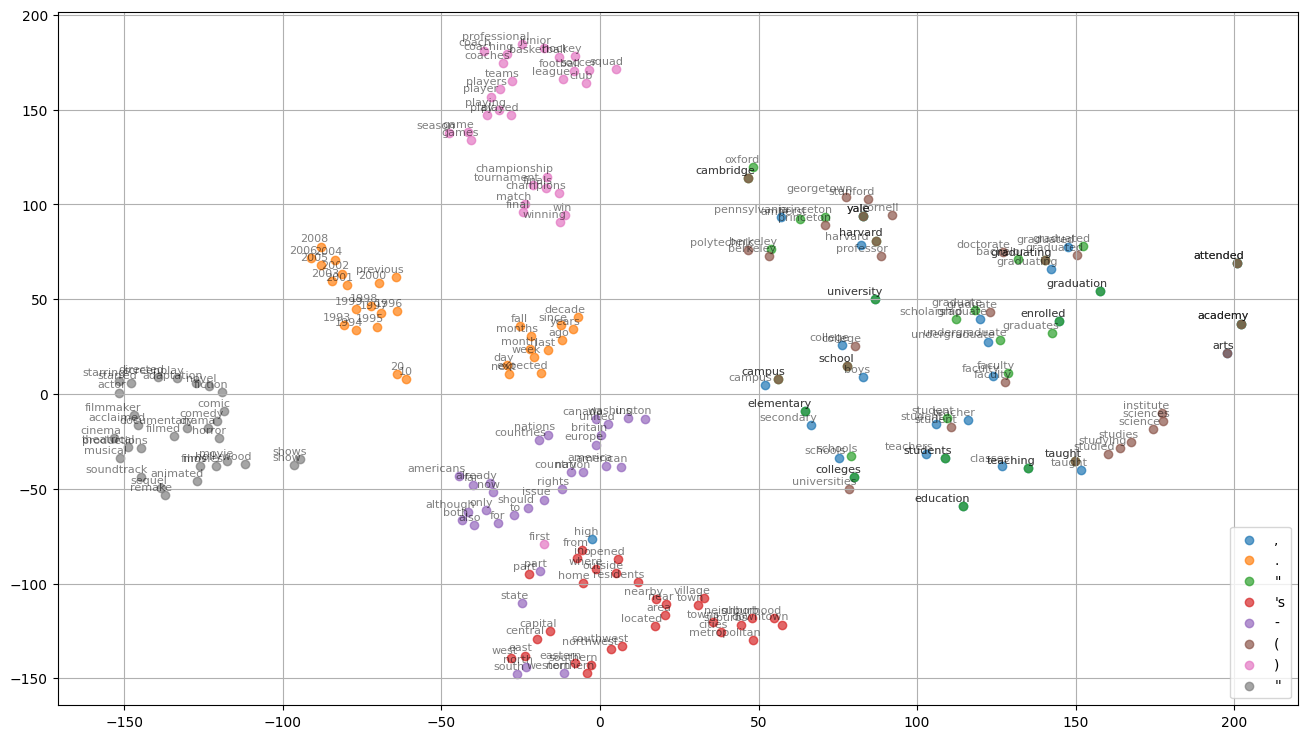

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

#script for constructing two-dimensional graphics using Matplotlib
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))


    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

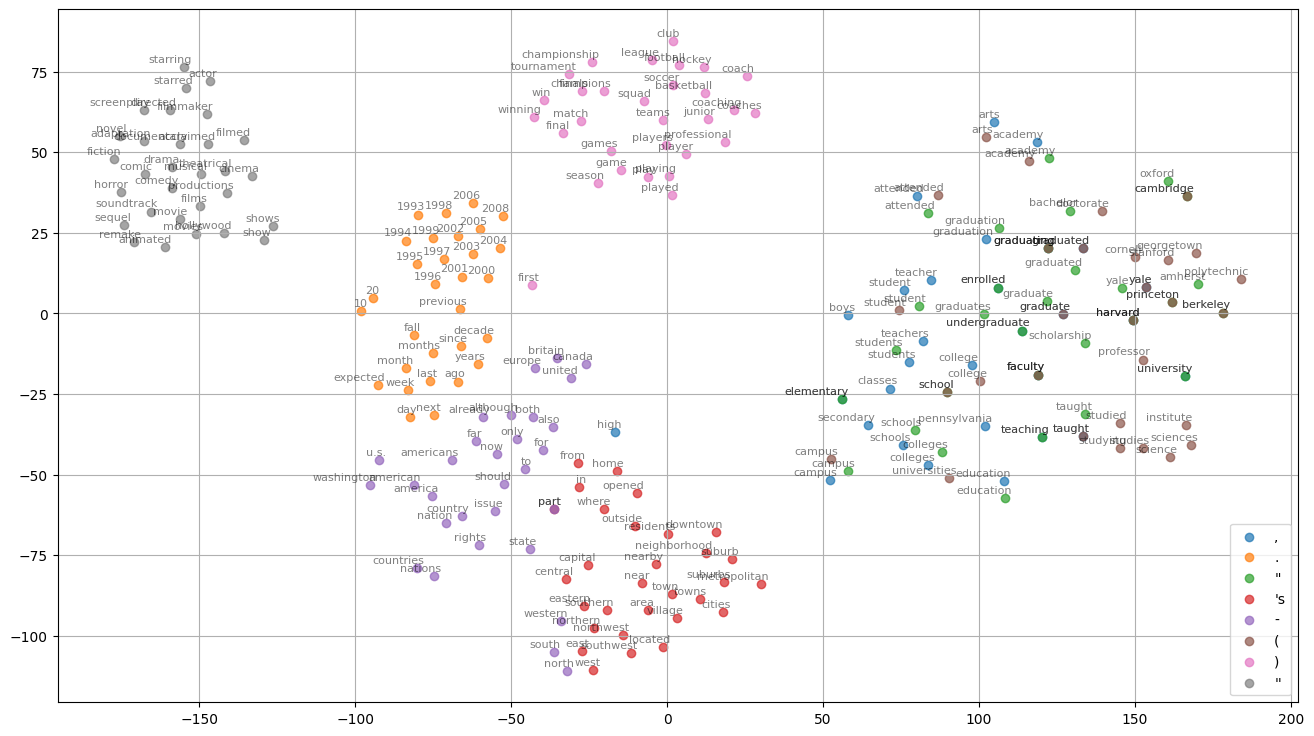

In [8]:
tsne_model_en_2d = TSNE(perplexity=25, n_components=2, init='pca', n_iter=1500, random_state=2020)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

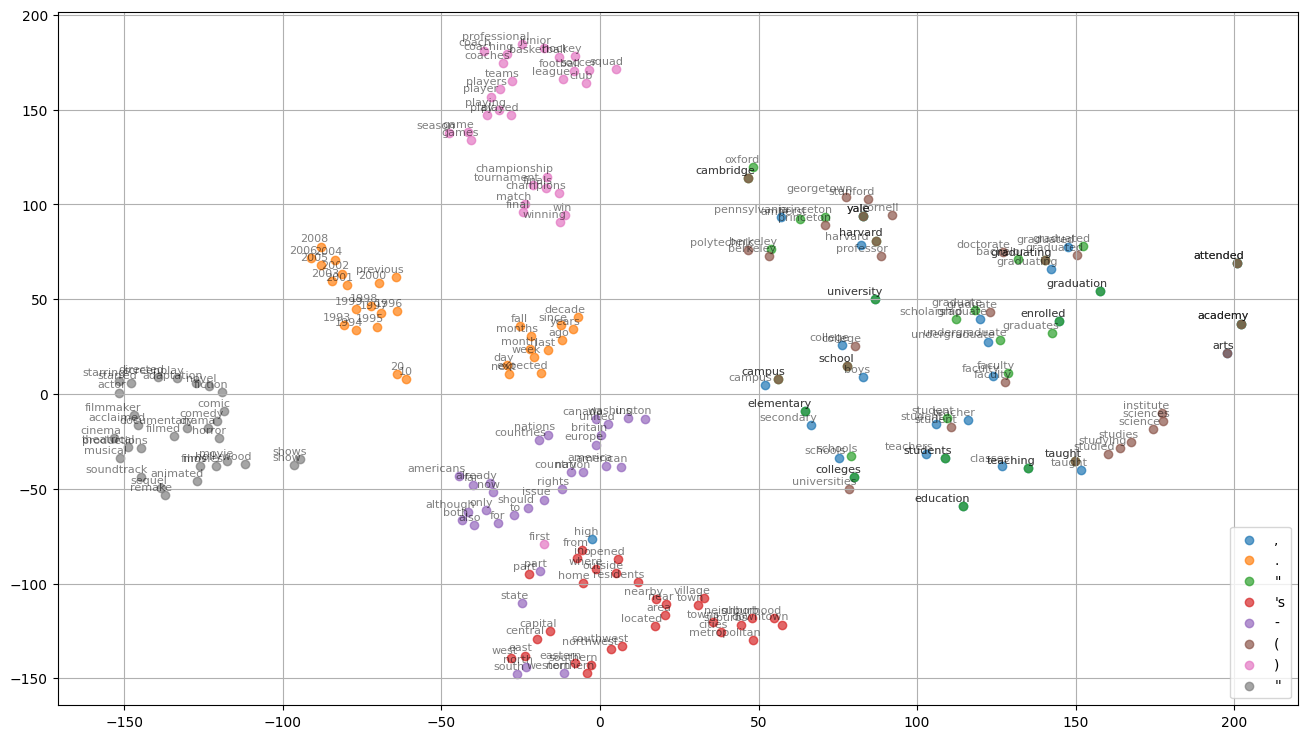

In [9]:
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

Take a look at the above 3 graphs. We cannto say a higher or lower perplexity is good. It depends on the problem at hand. Here the plots of perplexity 5,10 are much better defined than the one with 25

### Exercise
now try to visualize the closest words to the following list: `['school', 'year', 'college', 'city', 'states', 'university', 'team', 'film']`